# Energy efficiency Data Set
## Table of contents
### 1. The problem statement
> 1.1 Basic Understanding of terms

### 2. Understanding data
> 2.1 Basic Checks

> 2.2 Cleaning the null values

> 2.3 Exploratory Data Analysis

### 3. Data Preparation for Modelling
> 3.1 Converting to Train and Test sets

### 4. Modelling
> 4.1 Running Baseline Models on full data using Cross-Validation

> 4.2 Visualizing Hyperpatameter's effect on the model's score

> 4.3 Hyperpatameter Tuning of selected models using GridsearchCV on Train data

> 4.4 Checking the model's performance on test data

> 4.5 Visualizing the Residuals

### 5. Summary
 



# 1. The Problem Statement
>Problem Statement : The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem.

>Attribute Information :
> - X1 Relative Compactness 
> - X2 Surface Area 
> - X3 Wall Area 
> - X4 Roof Area 
> - X5 Overall Height 
> - X6 Orientation 
> - X7 Glazing Area 
> - X8 Glazing Area Distribution 
> - y1 Heating Load 
> - y2 Cooling Load

>Dataset Attached

>Essentials for Submissions : 3-4 Data Analytics Approaches to solve problem. (Clear steps can be inline code, detailed EDA, modelling approach using R/Python, key focus on Data Science part, power point not required.) Submission Timeline – 05th June 2020

## 1.1 Basic Understanding of terms
> - Relative compactness (Rc): The Rc of a shape is derived in that its volume to surface ratio is compared to that of the most compact shape with the same volume.

> - Surface Area: Total surface area under consideration

> - Wall Area: Surface area of sidewalls

> - Roof Area: Surface area of roof only

> - Overall Height: Overall height of the building

> - Orientation: Direction

> - Glazing Area: The term 'glazing' refers to the glass component of the building's facade or internal surfaces. Area of the glass part.

> - Glazing Area Distribution: The distribution of the Glass components

> - Heating Load: Heat load refers to the amount of heating that a building needs to maintain the indoor temperature at established levels.

> - Cooling Load: The cooling load is the rate at which sensible and latent heat must be removed from the space to maintain a constant space dry-bulb air temperature and humidity. The heating and cooling loads, or "thermal loads", take into account: the dwelling's construction and insulation; including floors, walls, ceilings and roof

These are the terms of buildings. Heating loads and Cooling loads are the dependent variables and the values depend on the 8 attribute values above.

# 2. Understanding Data


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To keep track of time
import time

# To Scale the Attributes
from sklearn.preprocessing import MinMaxScaler

# Train Test split
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# Regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

## 2.1 Basic Checks

In [2]:
# Reading the data to a pandas dataframe
df = pd.read_csv("Data.csv")
df.head()

X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2  Unnamed: 10  \
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33          NaN   
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33          NaN   
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33          NaN   
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33          NaN   
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28          NaN   

   Unnamed: 11  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

We have some unintentional columns in the data set. Let's see the dataset properties.

In [3]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           768 non-null    float64
 1   X2           768 non-null    float64
 2   X3           768 non-null    float64
 3   X4           768 non-null    float64
 4   X5           768 non-null    float64
 5   X6           768 non-null    float64
 6   X7           768 non-null    float64
 7   X8           768 non-null    float64
 8   Y1           768 non-null    float64
 9   Y2           768 non-null    float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(12)
memory usage: 121.6 KB


## 2.2 Cleaning the null values
> - There is no data in the unnamed columns. It can be deleted.
> - The number of rows is higher than mentioned in the problem statement. If they are null point, can be deleted.

In [4]:
# Deleting the rows if it has more null values than number of useful columns
df = df.dropna(axis = 0, thresh = 10 )

# Deleting the unwanted columns
df = df.dropna(axis = 1 )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 66.0 KB


In [5]:
# Checking the duplicate rows
print("Number of duplicate rows: ",df.duplicated().sum())

Number of duplicate rows:0


Data is clean and does not have any rows with all the data points being the same.

In [6]:
# Print dataframe
df

X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28
..    ...    ...    ...     ...  ...  ...  ...  ...    ...    ...
763  0.64  784.0  343.0  220.50  3.5  5.0  0.4  5.0  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5  2.0  0.4  5.0  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5  3.0  0.4  5.0  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5  4.0  0.4  5.0  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5  5.0  0.4  5.0  16.64  16.03

[768 rows x 10 columns]

In [7]:
# For better clarity lets change the variable names
df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']
df

Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   
765                  0.62         808.5      367.5     220.50             3.5   
766                  0.62         808.5      367.5     220.50             3.5   
767                  0.62         808.5      367.5     220.50             3.5   

     Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2.0           0.0                        0.0         15.55   
1            3.0           0.0                        0.0         15.55   
2            4.0           0.0                        0.0         15.55   
3            5.0           0.0                        0.0         15.55   
4            2.0           0.0                        0.0         20.84   
..           ...           ...                        ...           ...   
763          5.0           0.4                        5.0         17.88   
764          2.0           0.4                        5.0         16.54   
765          3.0           0.4                        5.0         16.44   
766          4.0           0.4                        5.0         16.48   
767          5.0           0.4                        5.0         16.64   

     Cooling_Load  
0           21.33  
1           21.33  
2           21.33  
3           21.33  
4           28.28  
..            ...  
763         21.40  
764         16.88  
765         17.11  
766         16.61  
767         16.03  

[768 rows x 10 columns]

Now the data is good for performing EDA

## 2.3 Exploratory Data Analysis

In [8]:
# Let us see the stats of each variable
df.describe()

Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000                    0.00000   
25%           3.50000     2.750000      0.100000                    1.75000   
50%           5.25000     3.500000      0.250000                    3.00000   
75%           7.00000     4.250000      0.400000                    4.00000   
max           7.00000     5.000000      0.400000                    5.00000   

       Heating_Load  Cooling_Load  
count    768.000000    768.000000  
mean      22.307201     24.587760  
std       10.090196      9.513306  
min        6.010000     10.900000  
25%       12.992500     15.620000  
50%       18.950000     22.080000  
75%       31.667500     33.132500  
max       43.100000     48.030000

All attributes are numerical and ranges are quite diffrent. Need to normalize before attemting any regression modelling.

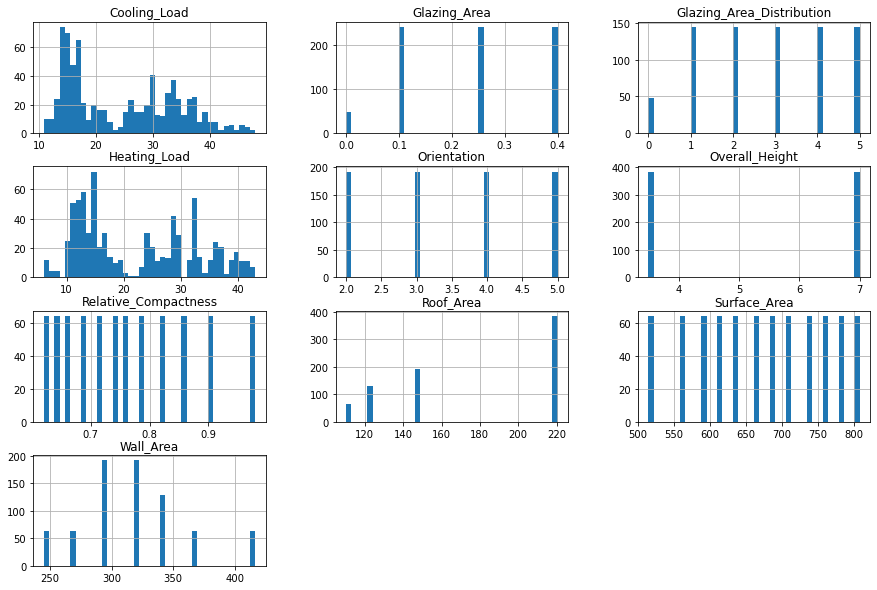

In [9]:
# Let us see the distribution of each variable
df.hist(figsize=(15,10), bins = 40,)
plt.show()


Distribution of the data is not following Gaussian distribution and clearly shows that the attributes are having a limited number of unique data values, like categorical values. From basic unerstanding from the terminology, the values have significance hence we should not consider them as lables. Let us see the unique number of values in the data set except for Heating and cooling loads.

In [10]:
# Let us see all the unique values in all attributes
for i in df.columns[0:8]:
    print(i,'\n\tValues:', df[i].unique(),'\n\tTotal Number of valuesValues:', len(df[i].unique()),'\n')

Relative_Compactness 
	Values: [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62] 
	Total Number of valuesValues: 12 

Surface_Area 
	Values: [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5] 
	Total Number of valuesValues: 12 

Wall_Area 
	Values: [294.  318.5 343.  416.5 245.  269.5 367.5] 
	Total Number of valuesValues: 7 

Roof_Area 
	Values: [110.25 122.5  147.   220.5 ] 
	Total Number of valuesValues: 4 

Overall_Height 
	Values: [7.  3.5] 
	Total Number of valuesValues: 2 

Orientation 
	Values: [2. 3. 4. 5.] 
	Total Number of valuesValues: 4 

Glazing_Area 
	Values: [0.   0.1  0.25 0.4 ] 
	Total Number of valuesValues: 4 

Glazing_Area_Distribution 
	Values: [0. 1. 2. 3. 4. 5.] 
	Total Number of valuesValues: 6 



It can clearly seen, that this is a highly engineered problem with combination of values of the attributes to find Heating and Cooling loads. This could be thought as a regression kind of problem initially, but;

> 1. The attributes distribution is not following Gaussin distribution, hence linear regression kind of algorithms do not perform well.

> 2. Since the range of Heating and Cooling loads are between 0 and 50, also aim is not to find the exact values as in the case of Engineering soltions. We can think each set as a class and  use classofocation algorithms.

> 3. This gives us an advantage to use clasification algorithems instead of going with regression algorithems.

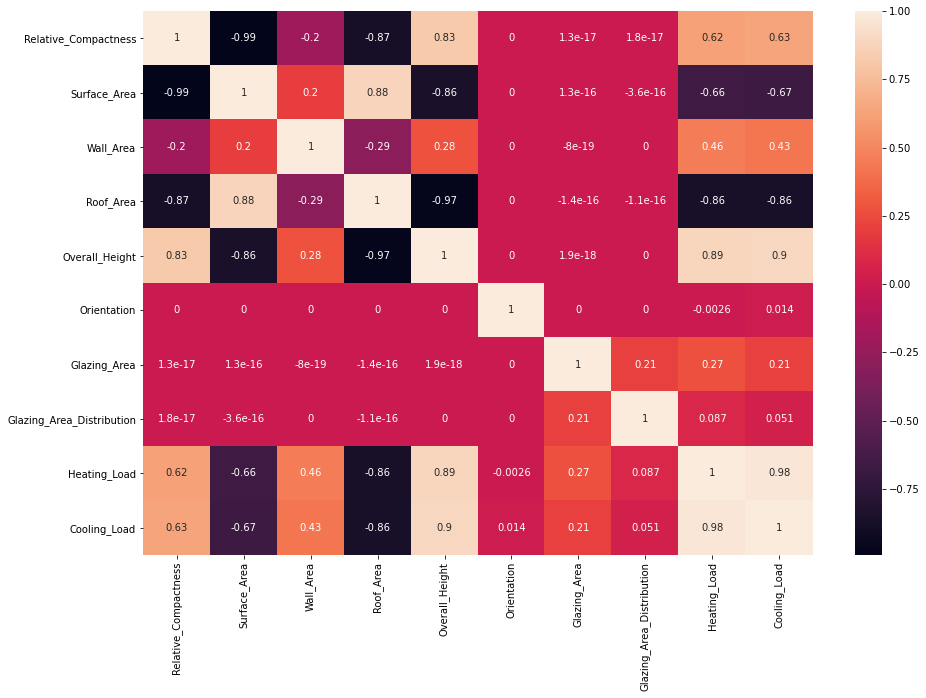

In [11]:
# Let us observe the correlation among the variables
correlation = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)
plt.show()

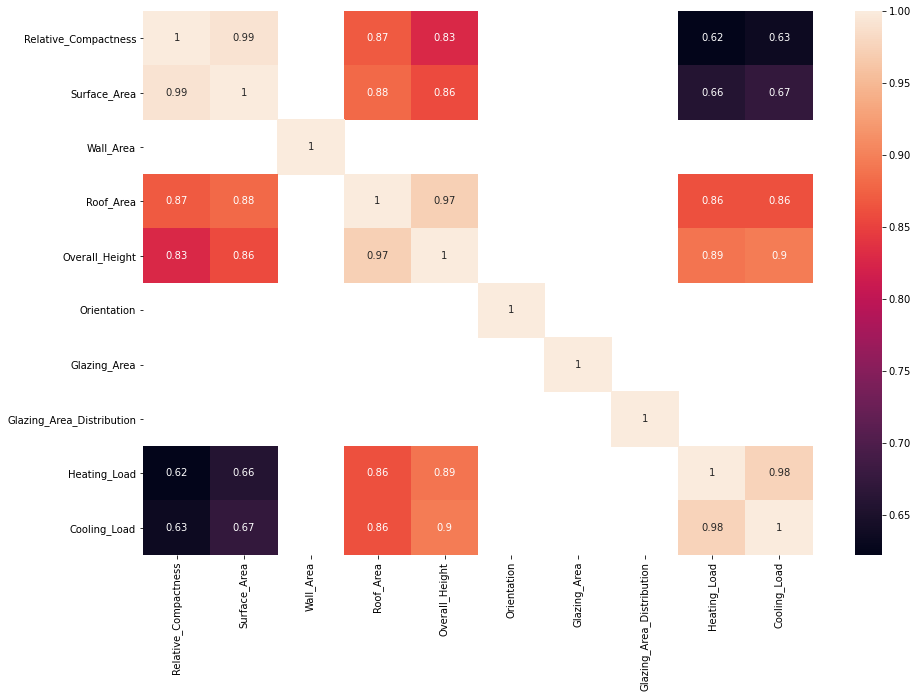

In [12]:
# To make it more clear lets see only the pairs with correlation more than 0.5
correlation = df.corr().abs() # Note: Absolute value of correlation
plt.figure(figsize=(15,10))
sns.heatmap(correlation[correlation > 0.5], annot=True)
plt.show()


> - From the above figure it is evident that (Irrespective of sign of correlation), there are 6 pairs of highly correlated attributes among just 8 attributes. 
> - We cannot drop them as we lose the information they provide. 
> - This still pushes us not to use linear regression kind of algorithems where multiclinearity give problems in final models. 
> - Tree based models works best in these kind of datasets where we have all categorical attributes. 
> - We can go with tree based classifiers and regressors.

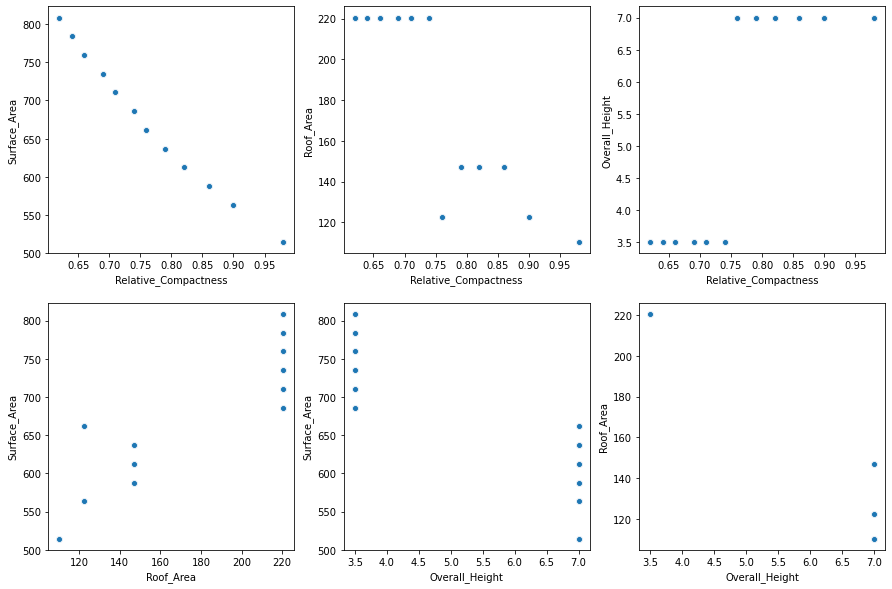

In [13]:
# Out of curiosity lets visualize the correlation of highest(>0.85) correlated attributes

fig = plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
sns.scatterplot(df.Relative_Compactness, df.Surface_Area)

plt.subplot(2, 3, 2)
sns.scatterplot(df.Relative_Compactness, df.Roof_Area)

plt.subplot(2, 3, 3)
sns.scatterplot(df.Relative_Compactness, df.Overall_Height)

plt.subplot(2, 3, 4)
sns.scatterplot(df.Roof_Area, df.Surface_Area)

plt.subplot(2, 3, 5)
sns.scatterplot(df.Overall_Height, df.Surface_Area)

plt.subplot(2, 3, 6)
sns.scatterplot(df.Overall_Height, df.Roof_Area)


plt.show()



As we have observed before this is a well thought engineerd problem. Hence the correlation is clear.

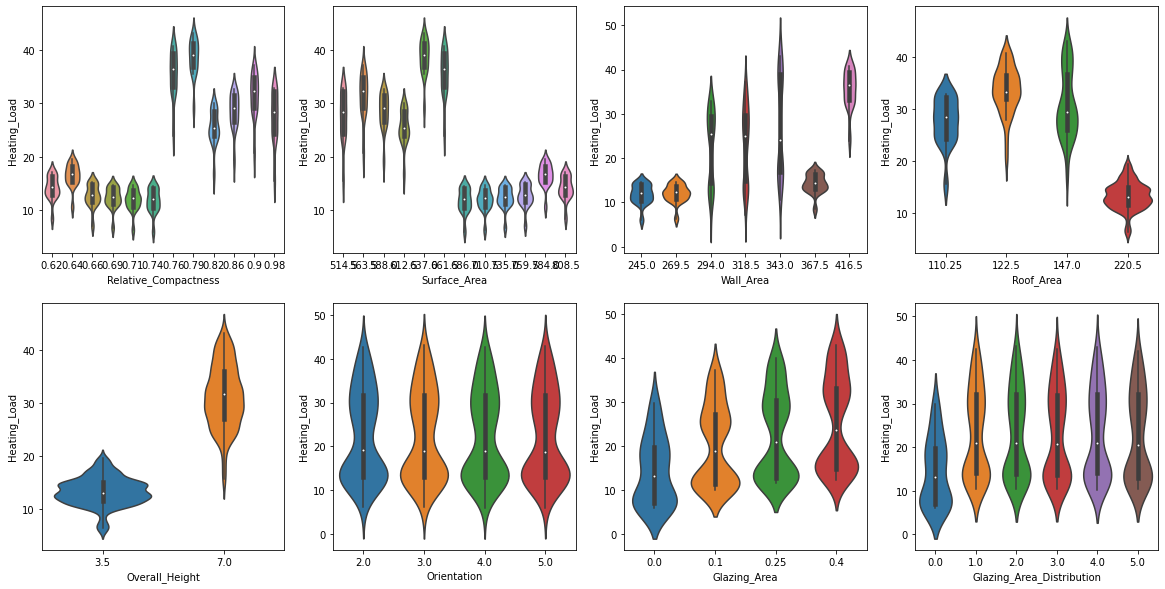

In [14]:
# Visualizing the Heating load (Dependent Variable) behaviour with attributes
# Violin plots are great at visualising the target variables distributions across categories of an attribute. Some times better than box plots

fig = plt.figure(figsize=(20,10))
col = df.columns[0:8] # Lis of variable names

for i in range(0,8):
    plt.subplot(2, 4, i+1)
    sns.violinplot(x=col[i],y='Heating_Load',data = df)
plt.show()

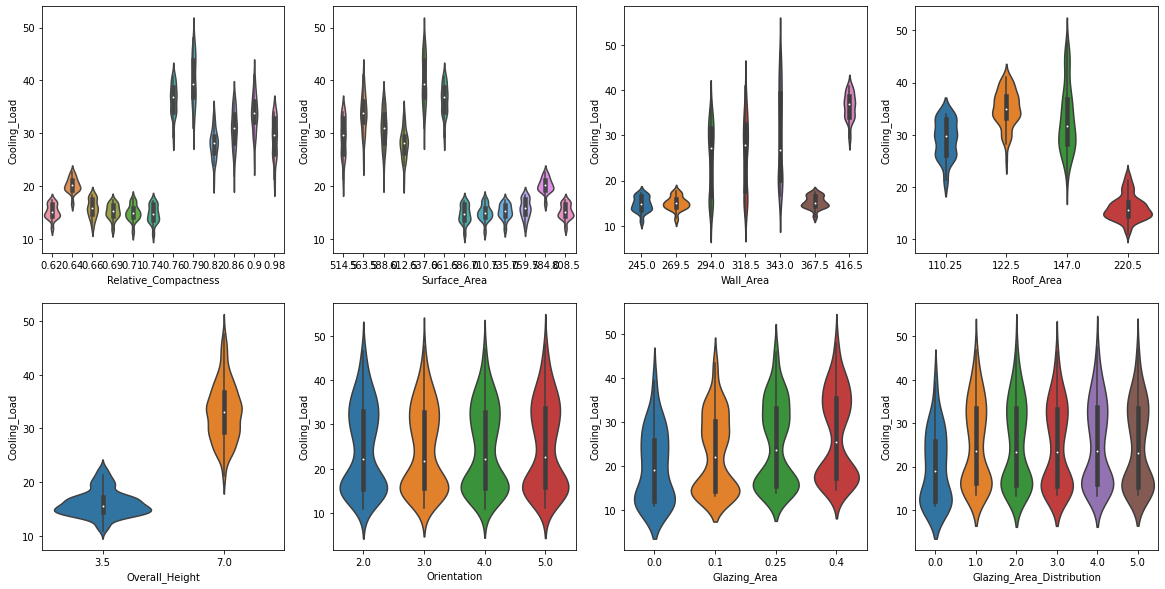

In [15]:
# Visualising the Cooling load (Dependent Variable) behaviour with attributes
fig = plt.figure(figsize=(20,10))

for i in range(0,8):
    plt.subplot(2, 4, i+1)
    sns.violinplot(x=col[i],y='Cooling_Load',data = df)
plt.show()

### From the plots above we can observe that, to keep heating and cooling load;
> 1. Relative compactness should be kept lower.
> 2. Surface area is negativly correlated to Relative compactness and need to be kept high.
> 3. Wall area need to be less.
> 4. Roof area has to be on the higher side.
> 5. Overall height should be less. 
> 6. There is not much dependency on Orientation.
> 7. Although not a significant diffrence Glazing area need to be less.
> 8. Glazing should not be there. If at all present, its distribution do not affect the loads much.

# 3. Data Preparation

In [16]:
# Scaling the attribute valuse using MinMax scaler
mms = MinMaxScaler()

# Dividing the dataframe to X attributes and y targets
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area',    'Roof_Area',
        'Overall_Height',       'Orientation',  'Glazing_Area', 'Glazing_Area_Distribution']]
X = mms.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns[0:8])

y = df[['Heating_Load', 'Cooling_Load']]


# Checking the shape
print(X.shape)
print(y.shape)

(768, 8)
(768, 2)


In [17]:
# Check Target variable
y

Heating_Load  Cooling_Load
0           15.55         21.33
1           15.55         21.33
2           15.55         21.33
3           15.55         21.33
4           20.84         28.28
..            ...           ...
763         17.88         21.40
764         16.54         16.88
765         16.44         17.11
766         16.48         16.61
767         16.64         16.03

[768 rows x 2 columns]

In [18]:
# Rounding all the values to nearest integer and change to int. This can be done as the data range is 0-50.
# This cannt be done if the data range is nearer to 0 that is for example 0-2.
y = round(y,0)
y = y.astype(int)
y

Heating_Load  Cooling_Load
0              16            21
1              16            21
2              16            21
3              16            21
4              21            28
..            ...           ...
763            18            21
764            17            17
765            16            17
766            16            17
767            17            16

[768 rows x 2 columns]

In [19]:
# Lets check the number of classes in the target variables
print('Unique values in heating load column in original data:',len(df.Heating_Load.unique()))
print('Unique values in heating load column in rounded data:',len(y.Heating_Load.unique()))
print('Unique values in cooling load column in original data:',len(df.Cooling_Load.unique()))
print('Unique values in cooling load column in original data:',len(y.Cooling_Load.unique()))

Unique values in heating load column in original data: 586
Unique values in heating load column in rounded data: 37
Unique values in cooling load column in original data: 636
Unique values in cooling load column in original data: 38


This rounding off significantly reduces the number of output classes and simplifies our model to a great extent.

In [20]:
# Performing the train and test split. As we have just 768 data points, we cannot lose most of them to test the model.
# Hence taking 20% data as testset than the default 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [21]:
# Checking the data shapes
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614, 2)
y_test shape: (154, 2)


In [22]:
# Dividing the target variable into Heating load and cooling load
yh = y['Heating_Load']
yc = y['Cooling_Load']
yh_train = y_train['Heating_Load']
yh_test = y_test['Heating_Load']
yc_train = y_train['Cooling_Load']
yc_test = y_test['Cooling_Load']

# 4. Modelling

## 4.1 Running baseline models on full data using KFold Cross-Validation

In [23]:
# This is the fuction definition to train models by taking attributes and target datasets as arguments.
# As we have observed above the data can be modelled using tree based models. Before deciding the best model let us form a basline performance of all models.

# Cross validating various tree based classification and regression models.

def CrossValidation(X,y): 
  kfold_num = 5
  ran_st_no = 100
  
  ##### Models to be considered
  etcl = ExtraTreesClassifier(random_state = ran_st_no)
  dtcl = DecisionTreeClassifier(random_state = ran_st_no)
  rfcl = RandomForestClassifier(random_state = ran_st_no)
  etr = ExtraTreesRegressor(random_state = ran_st_no)
  dtr = DecisionTreeRegressor(random_state = ran_st_no)
  rfr = RandomForestRegressor(random_state = ran_st_no)
  
  #### For tracking time taken for each model
  start_time = time.time()

  ##### Kfold Cross Validation #####
  for modeltype in [etcl, dtcl, rfcl, etr, dtr, rfr]:
    kf = KFold(n_splits=kfold_num,shuffle=True,random_state=ran_st_no)
    pred_test_full = 0
    cv_score = []
    maxerrors = []
    i=1
    for train_index,test_index in kf.split(X,y):
      print('{} of KFold {}'.format(i,kf.n_splits))
      xtr,xvl = X.loc[train_index],X.loc[test_index]
      ytr,yvl = y.loc[train_index],y.loc[test_index]
    
      #model
      modeltype.fit(xtr,ytr)
      r2score = r2_score(np.array(yvl).reshape(-1),modeltype.predict(xvl).reshape(-1))
      maxerror = max_error(np.array(yvl).reshape(-1),modeltype.predict(xvl).reshape(-1))
      print('R2 score, max error =',round(r2score,4),',',round(maxerror,4))
      cv_score.append(r2score)
      maxerrors.append(maxerror)    
      i+=1
    ###### Printing metrics of individual models
    print('*******************************',str(modeltype).split('(')[0],'R2 score:',round(np.mean(cv_score),4))
    print('*******************************',str(modeltype).split('(')[0],'max error:',round(np.max(maxerrors),4))
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Time taken:',round((time.time()-start_time)/60,4),'mins')
    start_time = time.time()

  print('--------------Analysis Complete-------------')

  return([etcl, dtcl, rfcl, etr, dtr, rfr])

In [24]:
# Executing CrossValidation of models on all data for comparison (Heating load)
baseline_models = CrossValidation(X,yh)

1 of KFold 5
R2 score, max error = 0.9957 , 2
2 of KFold 5
R2 score, max error = 0.9938 , 3
3 of KFold 5
R2 score, max error = 0.9954 , 3
4 of KFold 5
R2 score, max error = 0.9946 , 3
5 of KFold 5
R2 score, max error = 0.9951 , 2
******************************* ExtraTreesClassifier R2 score: 0.9949
******************************* ExtraTreesClassifier max error: 3
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Time taken: 0.0249 mins
1 of KFold 5
R2 score, max error = 0.9946 , 2
2 of KFold 5
R2 score, max error = 0.9952 , 3
3 of KFold 5
R2 score, max error = 0.9946 , 3
4 of KFold 5
R2 score, max error = 0.9962 , 2
5 of KFold 5
R2 score, max error = 0.9929 , 7
******************************* DecisionTreeClassifier R2 score: 0.9947
******************************* DecisionTreeClassifier max error: 7
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Time taken: 0.0013 mins
1 of KFold 5
R2 score, max error = 0.9959 , 2
2 of KFold 5
R2 score, max error = 0.9942 , 3
3 of KFold 5
R2 score, max error = 0.9913 , 8
4 of KFold 5
R

#### Top 2 performing models for Heating load
> 1. ExtraTreesRegressor R2 score: 0.9967
> 2. RandomForestRegressor R2 score: 0.9964

We see here regression models did well compared to classification algorithems. (Max error is 3 to 3.19)

In [25]:
# Executing CrossValidation of models on all data for comparison (Cooling load)
baseline_models = CrossValidation(X,yc)

1 of KFold 5
R2 score, max error = 0.9434 , 10
2 of KFold 5
R2 score, max error = 0.957 , 10
3 of KFold 5
R2 score, max error = 0.9528 , 9
4 of KFold 5
R2 score, max error = 0.9544 , 10
5 of KFold 5
R2 score, max error = 0.9508 , 10
******************************* ExtraTreesClassifier R2 score: 0.9517
******************************* ExtraTreesClassifier max error: 10
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Time taken: 0.0239 mins
1 of KFold 5
R2 score, max error = 0.9455 , 10
2 of KFold 5
R2 score, max error = 0.9562 , 9
3 of KFold 5
R2 score, max error = 0.9454 , 9
4 of KFold 5
R2 score, max error = 0.9528 , 9
5 of KFold 5
R2 score, max error = 0.948 , 9
******************************* DecisionTreeClassifier R2 score: 0.9496
******************************* DecisionTreeClassifier max error: 10
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Time taken: 0.0009 mins
1 of KFold 5
R2 score, max error = 0.9371 , 9
2 of KFold 5
R2 score, max error = 0.9551 , 9
3 of KFold 5
R2 score, max error = 0.9308 , 9
4 of KFol

#### Top 2 performing models for Cooling load
> 1. RandomForestRegressor R2 score: 0.9678
> 2. ExtraTreesRegressor R2 score: 0.9607

We see here DecisionTreeRegressor did not do very well, but close to extra tree classifier. (Max error is 6.78 to 10)

The best performing models are Random Forest Regressor and Extra Tree Regressor. We shall do hyper parameter tuning and try to bring Max error down.

## 4.2 Visualizing Hyperpatameter's effect on model's score

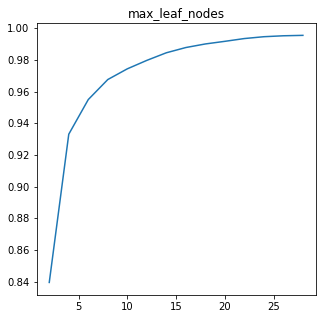

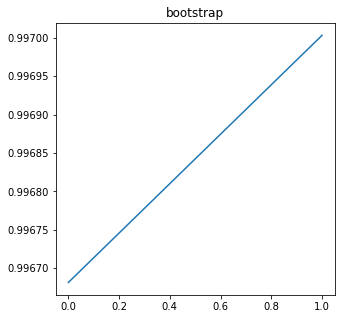

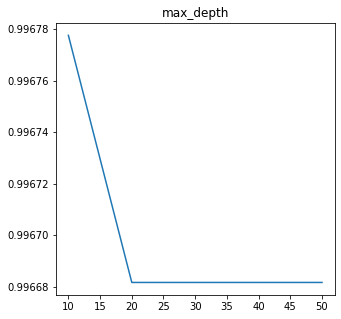

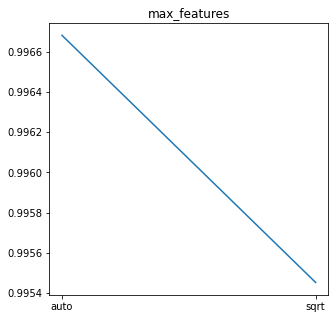

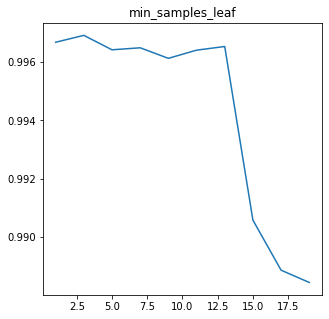

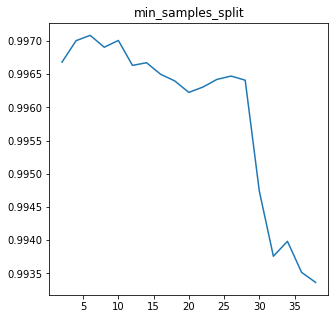

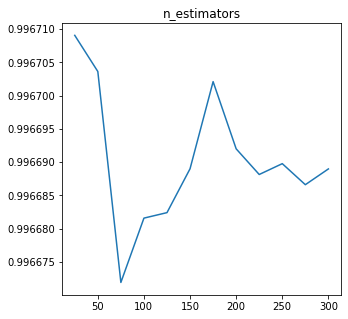

In [26]:
# Finding best params for ExtraTreesRegressor with Heating load visually

all_params = [{'max_leaf_nodes': list(range(2,30,2))},
              {'bootstrap': [True, False]},
              {'max_depth': [10, 20, 30, 40, 50, None]},
              {'max_features': ['auto', 'sqrt']},
              {'min_samples_leaf': list(range(1,20,2))},
              {'min_samples_split': list(range(2,40,2))},
              {'n_estimators': [25,50,75,100,125,150,175,200,225,250,275,300]}]


for p in range(0,len(all_params)):
    etr_test_score = []
    
    for v in range(0, len(list(all_params[p].values())[0])):
        etr_test = ExtraTreesRegressor(random_state = 100)
        etr_test.set_params(**{list(all_params[p].keys())[0]:list(all_params[p].values())[0][v]})
        etr_test.fit(X_train, yh_train)
        etr_test_score.append(etr_test.score(X_test, yh_test))
        #print({list(all_params[p].keys())[0]:list(all_params[p].values())[0][v]})

    plt.figure(figsize = (5,5))
    plt.plot(list(all_params[p].values())[0],etr_test_score)
    plt.title(list(all_params[p].keys())[0])

    plt.show()

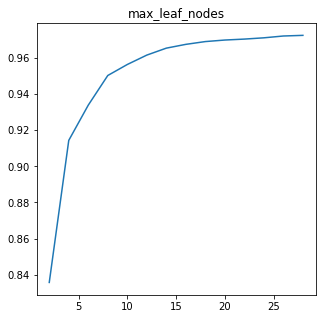

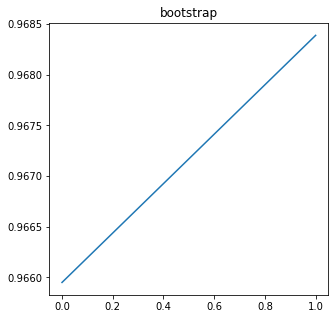

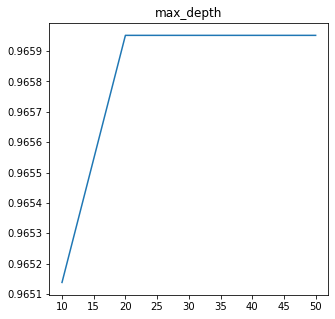

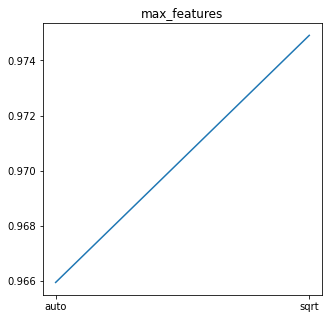

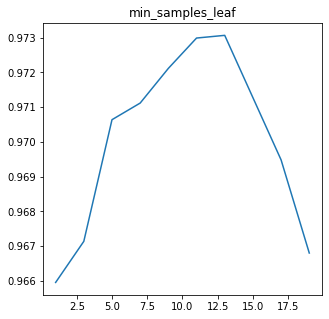

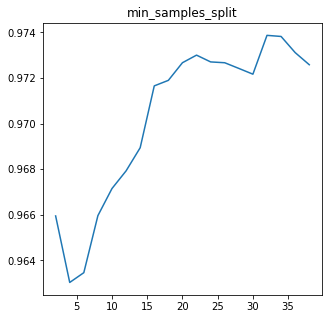

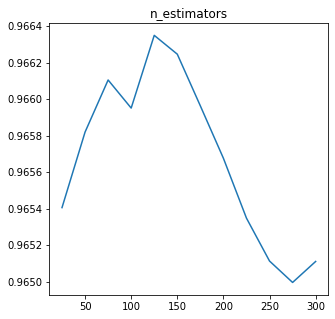

In [27]:
# Finding best params for ExtraTreesRegressor with Cooling load visually

all_params = [{'max_leaf_nodes': list(range(2,30,2))},
              {'bootstrap': [True, False]},
              {'max_depth': [10, 20, 30, 40, 50, None]},
              {'max_features': ['auto', 'sqrt']},
              {'min_samples_leaf': list(range(1,20,2))},
              {'min_samples_split': list(range(2,40,2))},
              {'n_estimators': [25,50,75,100,125,150,175,200,225,250,275,300]}]


for p in range(0,len(all_params)):
    etr_test_score = []
    
    for v in range(0, len(list(all_params[p].values())[0])):
        etr_test = ExtraTreesRegressor(random_state = 100)
        etr_test.set_params(**{list(all_params[p].keys())[0]:list(all_params[p].values())[0][v]})
        etr_test.fit(X_train, yc_train)
        etr_test_score.append(etr_test.score(X_test, yc_test))
        #print({list(all_params[p].keys())[0]:list(all_params[p].values())[0][v]})

    plt.figure(figsize = (5,5))
    plt.plot(list(all_params[p].values())[0],etr_test_score)
    plt.title(list(all_params[p].keys())[0])

    plt.show()




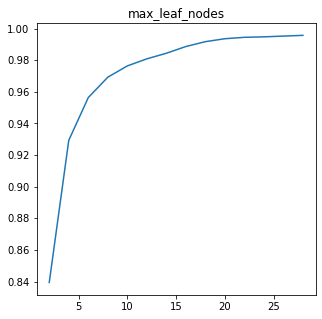

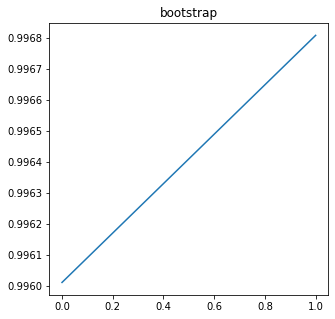

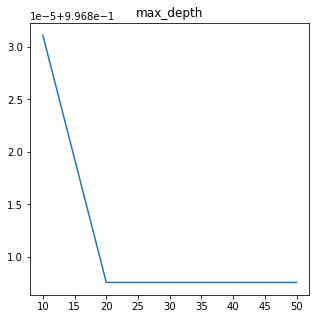

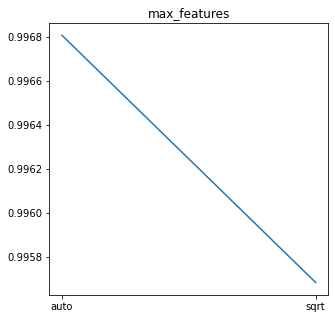

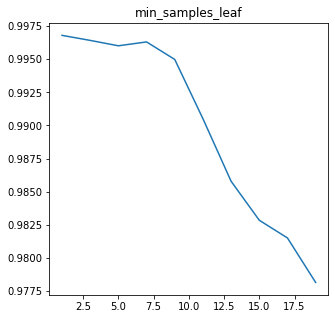

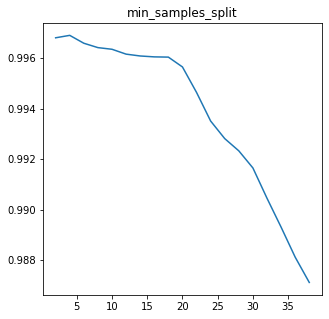

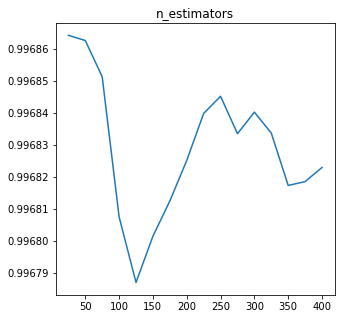

In [28]:
# Finding best params for RandomForestRegressor with Heating load visually

all_params = [{'max_leaf_nodes': list(range(2,30,2))},
              {'bootstrap': [True, False]},
              {'max_depth': [10, 20, 30, 40, 50, None]},
              {'max_features': ['auto', 'sqrt']},
              {'min_samples_leaf': list(range(1,20,2))},
              {'min_samples_split': list(range(2,40,2))},
              {'n_estimators': [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400]}]


for p in range(0,len(all_params)):
    rfr_test_score = []
    
    for v in range(0, len(list(all_params[p].values())[0])):
        rfr_test = RandomForestRegressor(random_state = 100)
        rfr_test.set_params(**{list(all_params[p].keys())[0]:list(all_params[p].values())[0][v]})
        rfr_test.fit(X_train, yh_train)
        rfr_test_score.append(rfr_test.score(X_test, yh_test))
        #print({list(all_params[p].keys())[0]:list(all_params[p].values())[0][v]})

    plt.figure(figsize = (5,5))
    plt.plot(list(all_params[p].values())[0],rfr_test_score)
    plt.title(list(all_params[p].keys())[0])

    plt.show()

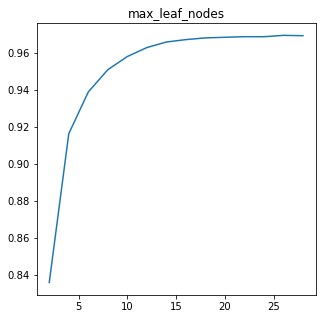

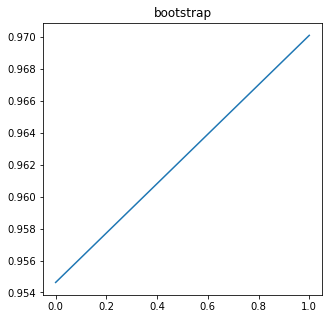

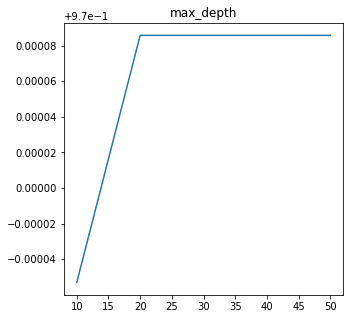

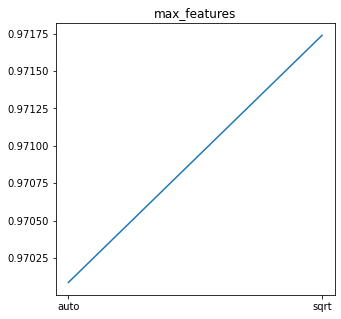

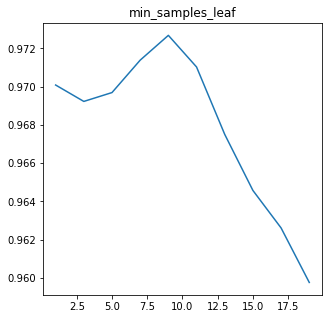

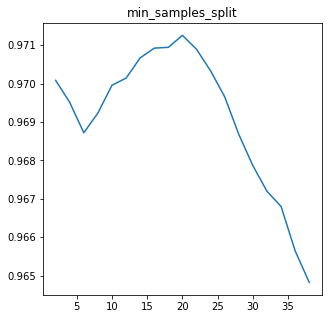

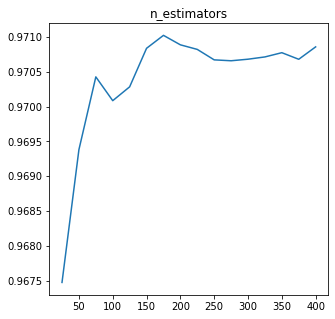

In [29]:
# Finding best params for RandomForestRegressor with Cooling load visually

all_params = [{'max_leaf_nodes': list(range(2,30,2))},
              {'bootstrap': [True, False]},
              {'max_depth': [10, 20, 30, 40, 50, None]},
              {'max_features': ['auto', 'sqrt']},
              {'min_samples_leaf': list(range(1,20,2))},
              {'min_samples_split': list(range(2,40,2))},
              {'n_estimators': [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400]}]


for p in range(0,len(all_params)):
    rfr_test_score = []
    
    for v in range(0, len(list(all_params[p].values())[0])):
        rfr_test = RandomForestRegressor(random_state = 100)
        rfr_test.set_params(**{list(all_params[p].keys())[0]:list(all_params[p].values())[0][v]})
        rfr_test.fit(X_train, yc_train)
        rfr_test_score.append(rfr_test.score(X_test, yc_test))
        #print({list(all_params[p].keys())[0]:list(all_params[p].values())[0][v]})

    plt.figure(figsize = (5,5))
    plt.plot(list(all_params[p].values())[0],rfr_test_score)
    plt.title(list(all_params[p].keys())[0])

    plt.show()

## 4.3 Hyperpatameter Tuning of selected models using GridsearchCV on Train data

In [30]:
# Building all the models in a function that takes X_train, y_train.

def ModelTuning(X_train,y_train):

  nfolds = 8 

  #### For tracking time taken for each model
  start_time = time.time() 
    
  #### Tuned RandomForestRegressor ####  
  RFRparams = {'bootstrap': [True, False],
              'max_depth': [10, 15, 20, 25, None],
              'min_samples_leaf': [1,8, 10],
              'min_samples_split': [2, 15,20],
              'n_estimators': [75,100, 150]}

  tunedRFR = GridSearchCV(RandomForestRegressor(random_state=42), RFRparams, verbose=1, cv=nfolds,scoring = 'r2', n_jobs = -1)
  tunedRFR_results = tunedRFR.fit(X_train, y_train)
  print('******************** tunedRFR Complete')


  #### Tuned ExtraTreesRegressor ####  
  ETRparams = {'bootstrap': [True, False],
              'max_depth': [10, 15, 20, 25, None],
              'min_samples_leaf': [1,10, 12],
              'min_samples_split': [2, 25,30,35],
              'n_estimators': [100, 125, 150]}
  tunedETR = GridSearchCV(ExtraTreesRegressor(random_state=42), ETRparams, verbose=1, cv=nfolds,scoring = 'r2', n_jobs = -1)
  tunedETR_results = tunedETR.fit(X_train, y_train)
  print('******************** tunedETR Complete')
  
  
  return(tunedRFR_results,tunedETR_results)

In [31]:
# Running the tuned models for Heating Load
TDRFRh, TDETRh = ModelTuning(X_train,yh_train)

Fitting 8 folds for each of 270 candidates, totalling 2160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.6min finished
******************** tunedRFR Complete
Fitting 8 folds for each of 360 candidates, totalling 2880 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | ela

In [32]:
# Running the tuned models for Cooling Load
TDRFRc, TDETRc = ModelTuning(X_train,yc_train)

Fitting 8 folds for each of 270 candidates, totalling 2160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.6min finished
******************** tunedRFR Complete
Fitting 8 folds for each of 360 candidates, totalling 2880 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | ela

## 4.4 Checking the model's performance on test data

In [33]:
# Lets see the summary of models and their performance on train and test data
print('Random Forest Reggresor on heating load:',   '\nBest Parameters',TDRFRh.best_params_,    '\nTrain R2 Score:',round(TDRFRh.best_score_,4))
print('Test R2 Score:', round(r2_score(yh_test, TDRFRh.best_estimator_.predict(X_test)),4))
print('Test max error:', round(max_error(yh_test, TDRFRh.best_estimator_.predict(X_test)),4),  '\n')


print('Extra Tree Reggresor on heating load:',      '\nBest Parameters',TDETRh.best_params_,    '\nTrain R2 Score:',round(TDETRh.best_score_,4))
print('Test R2 Score:', round(r2_score(yh_test, TDETRh.best_estimator_.predict(X_test)),4))
print('Test max error:', round(max_error(yh_test, TDETRh.best_estimator_.predict(X_test)),4),  '\n')


print('Random Forest Reggresor on cooling load:',   '\nBest Parameters',TDRFRc.best_params_,    '\nTrain R2 Score:',round(TDRFRc.best_score_,4))
print('Test R2 Score:', round(r2_score(yc_test, TDRFRc.best_estimator_.predict(X_test)),4))
print('Test max error:', round(max_error(yc_test, TDRFRc.best_estimator_.predict(X_test)),4),  '\n')


print('Extra Tree Reggresor on cooling load:',      '\nBest Parameters',TDETRc.best_params_,    '\nTrain R2 Score:',round(TDETRc.best_score_,4))
print('Test R2 Score:', round(r2_score(yc_test, TDETRc.best_estimator_.predict(X_test)),4))
print('Test max error:', round(max_error(yc_test, TDETRc.best_estimator_.predict(X_test)),4),  '\n')

Random Forest Reggresor on heating load: 
Best Parameters {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 
Train R2 Score: 0.9966
Test R2 Score: 0.9968
Test max error: 3.0 

Extra Tree Reggresor on heating load: 
Best Parameters {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125} 
Train R2 Score: 0.997
Test R2 Score: 0.9968
Test max error: 3.0 

Random Forest Reggresor on cooling load: 
Best Parameters {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150} 
Train R2 Score: 0.9662
Test R2 Score: 0.9705
Test max error: 6.84 

Extra Tree Reggresor on cooling load: 
Best Parameters {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 
Train R2 Score: 0.9636
Test R2 Score: 0.9695
Test max error: 6.94 



## 4.5 Visualizing the Residuals

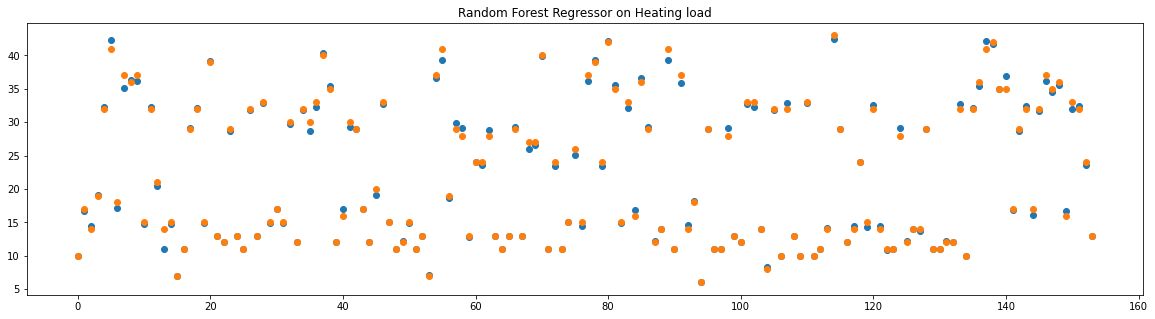

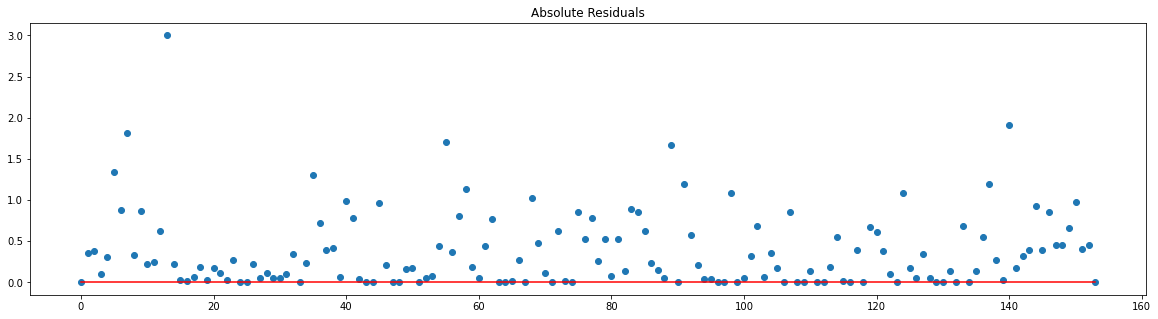

In [34]:
# Lets Visualise the real vs predicted data points Random Foest Regressor on heating load
plt.figure(figsize=(20,5))
plt.title('Random Forest Regressor on Heating load')
pred_data = TDRFRh.best_estimator_.predict(X_test)
x_axis = range(0,len(pred_data))
plt.scatter(x_axis, pred_data)
plt.scatter(x_axis,np.array(yh_test))
plt.show()

# Plot Absolute Residuals
plt.figure(figsize=(20,5))
plt.title('Absolute Residuals')
plt.scatter(x_axis,np.abs(pred_data-np.array(yh_test)))
plt.plot(x_axis,[0]*len(pred_data),'r')
plt.show()

There are very few points above 1.5 error mark

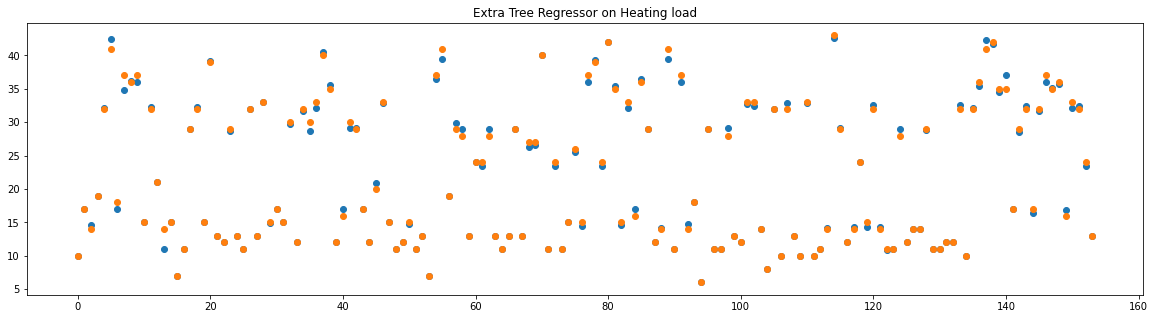

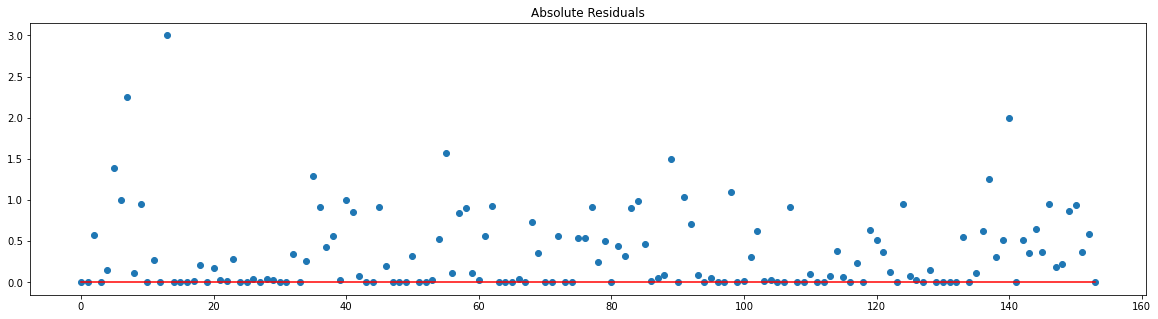

In [35]:
# Lets Visualise the real vs predicted data points Extra Tree Regressor on heating load
plt.figure(figsize=(20,5))
plt.title('Extra Tree Regressor on Heating load')
pred_data = TDETRh.best_estimator_.predict(X_test)
x_axis = range(0,len(pred_data))
plt.scatter(x_axis, pred_data)
plt.scatter(x_axis,np.array(yh_test))
plt.show()

# Plot Absolute Residuals
plt.figure(figsize=(20,5))
plt.title('Absolute Residuals')
plt.scatter(x_axis,np.abs(pred_data-np.array(yh_test)))
plt.plot(x_axis,[0]*len(pred_data),'r')
plt.show()

There are very few points above 1.5 error mark

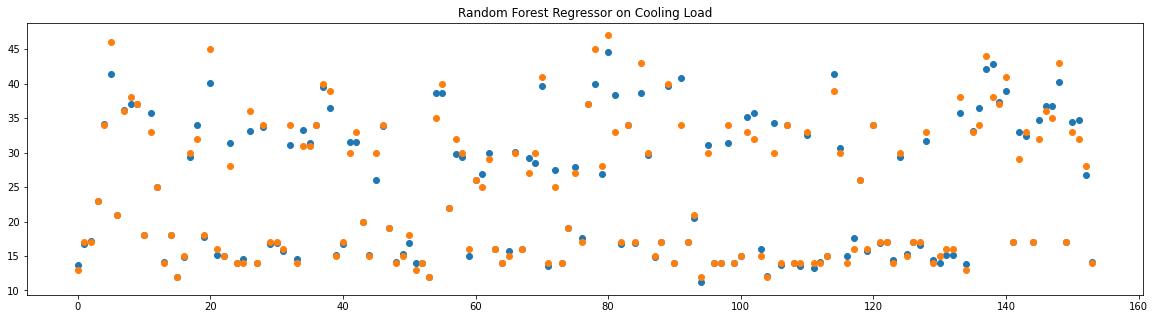

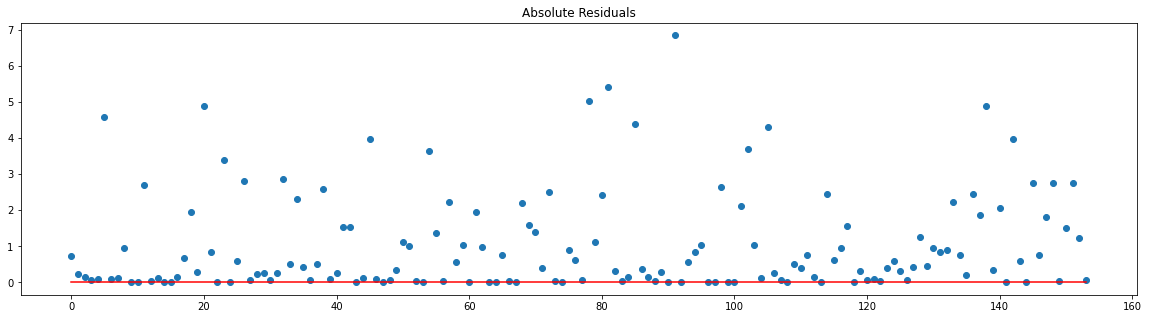

In [36]:
# Lets Visualise the real vs predicted data points Random Foest Regressor on cooling oad
plt.figure(figsize=(20,5))
plt.title('Random Forest Regressor on Cooling Load')
pred_data = TDRFRc.best_estimator_.predict(X_test)
x_axis = range(0,len(pred_data))
plt.scatter(x_axis, pred_data)
plt.scatter(x_axis,np.array(yc_test))
plt.show()

# Plot Absolute Residuals
plt.figure(figsize=(20,5))
plt.title('Absolute Residuals')
plt.scatter(x_axis,np.abs(pred_data-np.array(yc_test)))
plt.plot(x_axis,[0]*len(pred_data),'r')
plt.show()

There are some data points whos residulas are more than 3 specially in coolind load data that has reduced the R2 score. Still a test R2 score of 0.97 is very good.

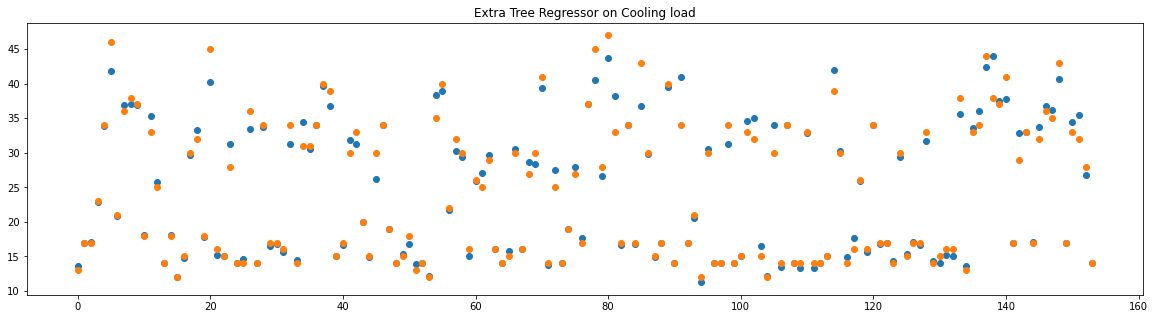

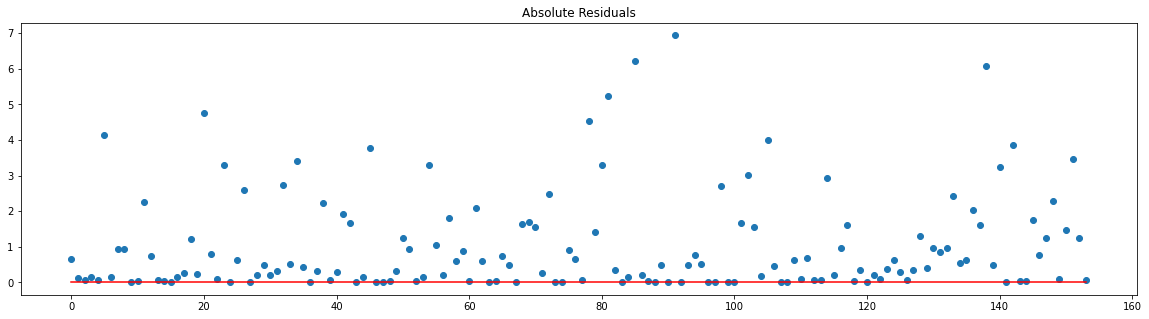

In [37]:
# Lets Visualise the real vs predicted data points Extra Tree Regressor on cooling load
plt.figure(figsize=(20,5))
plt.title('Extra Tree Regressor on Cooling load')
pred_data = TDETRc.best_estimator_.predict(X_test)
x_axis = range(0,len(pred_data))
plt.scatter(x_axis, pred_data)
plt.scatter(x_axis,np.array(yc_test))
plt.show()

# Plot Absolute Residuals
plt.figure(figsize=(20,5))
plt.title('Absolute Residuals')
plt.scatter(x_axis,np.abs(pred_data-np.array(yc_test)))
plt.plot(x_axis,[0]*len(pred_data),'r')
plt.show()

There are some data points whos residulas are more than 3 specially in coolind load data that has reduced the R2 score. Still a test R2 score of 0.97 is very good.
Also residulas do not show and incresing or decresing pattern and are distibuted visually normal.

# 5. Summary

> This data set is interesting in its way. All its attributes are categorical and still, the numerical value is a meaningful quantity. The amount of data is not very less or more. And the same time the target variables look continuos and once rounded, their unique values go around 40. This data set is best modeled with tree-based models.

> The data set given in CSV format is imported as a pandas data frame. As CSV has many unnecessary commas hence we got 2 empty columns and many empty rows which pandas read as NANs. Once cleaned, clear EDA has been performed with observations.

> As we have quantified data in attributes with very different ranges, all are brought to the same range of 0 to 1 using a min-max scaler. After this, the data set is split into train and test with 20% of total data going into the test dataset. The target data is further divided into cooling load and heating load separately to have more control over the final model or models.

> After data preparation, 6 tree-based models were run on the dataset using cross-validation to check their performance using the best R2 score. In total 4 models were selected, 2 for Cooling load and 2 for the Heating load. We have so much freedom as the data set is not big. These four models further trained and tuned to their respective target variables in train data (heating and cooling loads).

> Finally all four models are tested on test data which the models did not see. 
>> - TDETRh: Tuned Extra Tree Regressor model for the heating load can be chosen for heating load modeling, and
>> - TDRFRc: Tuned Random Forest Regressor model for the cooling load can be chosen for cooling load modeling.

> Residuals are visualized to check for any patterns and where exactly the highest errors are occurring.

Thank you

Srirama

srirama.contact@gmail.com

# END OF BOOK